In [1]:
%matplotlib inline
%load_ext zipline

/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [2]:
from IPython.display import HTML
HTML('''<style>td {font-size: 20px}</style>''')

|   |  |
| :---| :---|
| <div style="img-align: left"><img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74" alt="HCA" height="200" width="200"><div> | Zipline Bundle Update Notebook | 
| HotChili Platform | Version: 1.0.1,  Date:    2020-12-04 |

## Instructions to update zipline price bundles

**Run this notebook to update the zipline bundles that you need.**

Zipline gets external data to use for it's Pricing Data, through an interface called Ingestion, and using an internal data structure called a Bundle.

**A Bundle typically has a date range and a sampling rate (usually daily or minute).**

The following bundles are currently supported (note that all bundles starting with `sharadar-` require a Quandl-Sharadar subscription):
   1. quantopian-quandl (daily), daterange stops at ~5/20/2018, DEPRECATED
   2. sharadar-prices   (daily), SEP, date range up to current
   3. sharadar-funds    (daily), SFP, date range up to current
   4. sharadar-eqfd     (daily), US Equity Funds
   6. yahoo_csv         (Daily) Using a directory populated with Yahoo <asset>.csv files downloaded from Yahoo.
   6. yahoo_direct      (Daily) Using a list of assets, with a start and end date, with data scraped from Yahoo.
   6. iex               (Daily) Using IEX feed.



You can also create your own bundles using the csvdir method.

## HCA Live examples, with required bundle ingestion.
- Trend following: [notebook](./HCA_Trendfollowing_live/HCA_Trendfollowing.ipynb)
- Fixed ratio allocations: [notebook](./HCA_Fixed_Ratio_Allocations/HCA_Fixed_Ratio_Allocations.ipynb) and 
- All weather optimize volatility [notebook](./HCA_AllWeatherOptimizeVolatility/HCA_AllWeatherOptimizeVolatility.ipynb)
- In_and_Out [notebook](./HCA_In_and_Out/HCA_In_and_Out.ipynb)
- Momentum based Fundamentals and Pipeline [notebook](./HCA_Fundamentals/HCA_Fundamentals.ipynb)


In [3]:
import os

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Remove warnings wrt deprecation check.
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

print(f"hca_root_path = {os.environ['HCA_ROOT']}")

hca_root_path = /home/hca-ws2004/hca


## List your current zipline bundles

Uncomment and run the following cell.

In [4]:
!zipline bundles

/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))
extension: hca_root_path = /home/hca-ws2004/hca
extension:TODAY_STR = 2021-05-03
extension:TWO_YR_AGO_STR = 2019-05-03
extension:  start_date=2019-05-03 end_date = 2021-05-03
csvdir <no ingestions>
hca-symbol <no ingestions>
iex <no ingestions>
quandl 2021-04-21 22:21:40.481400
quandl 2021-04-21 22:20:52.473634
quantopian-quandl 2021-04-21 16:49:35.838015
sharadar-eqf

In [5]:
 saastech_syms =['ADBE', 
    'ADSK', 
    'APPF', 
    'AVLR', 
    'BL', 
    'BOX', 
    'VEEV', 
    'WDAY', 
    'WORK',
    'ZEN',
    'ZM'
]
#saastech_syms_str = str(saastech_syms)
saastech_syms_list = ",".join(saastech_syms)
saastech_syms_list

'ADBE,ADSK,APPF,AVLR,BL,BOX,VEEV,WDAY,WORK,ZEN,ZM'

## Run Bundle Ingest

Uncomment one or more lines in the following cell and run it.

Notice that they take varying amounts of time to complete.

If doing live trading that needs current bundle data,
you need to do this *before* live trading with zipline.

In [6]:
#------- Uncomment the bundles you want to create current ingestions -----#

#!zipline ingest -b sharadar-prices # ~10 minutes running time
#!zipline ingest -b sharadar-funds  # ~05 minutes running time
#!zipline ingest -b sharadar-eqfd   # ~20 minutes running time
# !zipline ingest -b hca-symbols     # ~01 minutes running time
# !zipline ingest -b yahoo_csv     # ~01 minutes running time
# 

#!export YAHOO_SYM_LST='SPY','ZSL','KOLD','GLD','SHY';zipline ingest -b yahoo_direct

#!export YAHOO_SYM_LST='SPY','ZSL','KOLD','GLD','SHY';zipline ingest -b yahoo_direct
#!export YAHOO_SYM_LST=$saastech_syms_list;zipline ingest -b yahoo_direct

In [7]:
#!export YAHOO_SYM_LST=MOBL;zipline ingest -b yahoo_direct

In [8]:
#Y=data.history(symbol('MOBL'))
#data = data.fillna(method='ffill')

import os

print(os.environ['ZIPLINE_ROOT'])
print(os.listdir(os.environ['ZIPLINE_ROOT']))


/home/hca-ws2004/zipline-broker
['setup.cfg', '.coveragerc', 'zipline_pip_install.log', 'Vagrantfile', '.eggs', 'etc', 'build', 'tests', 'data', '.appveyor.yml', 'zipline_live.egg-info', 'versioneer.py', 'LICENSE', '_config.yml', 'docs', 'Dockerfile-dev', 'AUTHORS', 'MANIFEST.in', '.gitattributes', 'conda', 'vagrant_init.sh', '.github', '.gitignore', 'ci', 'zipline-live_tests_output-2019-10-10.ans', '.dir-locals.el', '.git', '.dockerignore', '.travis.yml', 'extension.py', '__pycache__', 'Dockerfile', 'data-zlb-2021-04-12.tar.gz', 'setup.py', 'README.rst', 'CONTRIBUTING.rst', 'zipline']


In [9]:
import zipline
from zipline.data import bundles

bundle_name = 'sharadar-prices' #'sharadar-funds' #'yahoo_direct' #'sharadar-prices'   #'yahoo_direct' #'alpaca_api'
bundle_data = bundles.load(bundle_name)

In [10]:
#dir(bundle_data)

In [11]:
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.utils.calendars import get_calendar
from zipline.pipeline.data import USEquityPricing
from zipline.data.data_portal import DataPortal

import pandas as pd

# Set the dataloader
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader)
#pricing_loader = USEquityPricingLoader.without_fx(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader)


# Define the function for the get_loader parameter
def choose_loader(column):
    if column not in USEquityPricing.columns:
        raise Exception('Column not in USEquityPricing')
    return pricing_loader

# Set the trading calendar
trading_calendar = get_calendar('NYSE')

start_date = pd.Timestamp('2019-07-05', tz='utc')
end_date = pd.Timestamp('2021-04-10', tz='utc')

# Create a data portal
data_portal = DataPortal(bundle_data.asset_finder,
                         trading_calendar = trading_calendar,
                         first_trading_day = start_date,
                         equity_daily_reader = bundle_data.equity_daily_bar_reader,
                         adjustment_reader = bundle_data.adjustment_reader)


In [12]:
saastech_syms
for sym in["GE", "FB"]:
    print(sym)

GE
FB


In [13]:
equity = bundle_data.asset_finder.lookup_symbols(saastech_syms, end_date)
#equity = bundle_data.asset_finder.lookup_symbols(["FB", "GE"], end_date)
#equity = bundle_data.asset_finder.lookup_symbol("fb", end_date)
#data_portal.get_history_window(assets=[equity], end_dt=end_date, bar_count=10,
prices=data_portal.get_history_window(assets=equity, end_dt=end_date, bar_count=100,
                               frequency='1d',
                               field='close',
                               data_frequency='daily')

prices.plot()

In [14]:
prices.tail()

,Equity(188 [ADBE]),Equity(234 [ADSK]),Equity(828 [APPF]),Equity(1203 [AVLR]),Equity(1628 [BL]),Equity(1757 [BOX]),Equity(11736 [VEEV]),Equity(12074 [WDAY]),Equity(12217 [WORK]),Equity(12495 [ZEN]),Equity(12527 [ZM])
2021-04-06 00:00:00+00:00,491.34,285.50,142.79,141.57,112.26,24.11,265.43,254.90,41.41,139.33,329.79
2021-04-07 00:00:00+00:00,493.41,286.12,141.99,140.46,111.01,24.27,260.38,251.93,41.50,137.62,323.08
2021-04-08 00:00:00+00:00,499.84,293.43,143.01,143.15,113.29,22.00,263.38,257.04,41.67,142.04,331.28
2021-04-09 00:00:00+00:00,504.04,297.57,142.47,142.56,112.88,21.70,264.23,257.61,42.29,144.34,322.65
2021-04-12 00:00:00+00:00,506.03,294.50,142.50,143.39,113.27,21.55,263.04,259.51,41.94,146.36,321.51


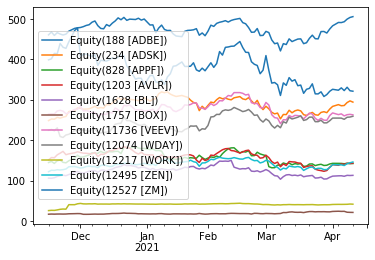

In [15]:
prices.plot()